In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_validate
import torch
from sklearn.model_selection import train_test_split
from torch import optim
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
train_df = pd.read_csv("./train_df_encode.csv")
#train_df.info()

In [3]:
#train_df.head(5)

In [4]:
# 全体の30%は検証用
train_data = train_df.values
X = train_data[:, 1:]  # 正解データ列以外を抽出
Y = train_data[:, 0]  # 正解データ列のみ抽出

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64) 
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64) 

In [5]:
net = nn.Sequential(
    nn.Linear(X.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 2)
)

In [6]:
#X = X.to("cuda:0")
#Y = Y.to("cuda:0")
#net.to("cuda:0")

In [7]:
# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
train_losses = []
test_losses = []

# 訓練用データでDataLoaderを作成
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=256, shuffle=True)

In [8]:
for epoch in range(10):
    running_loss = 0.0
    for i, (xx, yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / i)
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

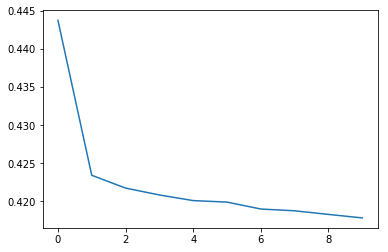

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(train_losses)

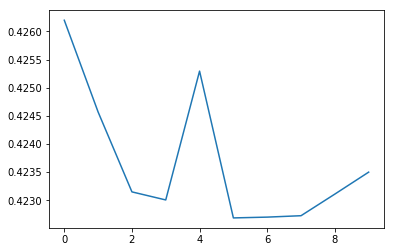

In [10]:
plt.plot(test_losses)